In [1]:
%matplotlib inline
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import netCDF4
from scipy import stats
import statsmodels.api as sm
import glob

/Users/gbromley/anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


ImportError: No module named 'cartopy'

In [ ]:
data = xr.open_dataset('~gbromley/data/ghcn_data.nc')

In [60]:
def filter(x):
    percent = x.count()/len(x)
    return percent

In [53]:
t_avg = (data['tmax'] + data['tmin'])/2

In [54]:
t_avg = t_avg.sel(time=slice('1925-01-01','2015-01-01'))

In [57]:
t_avg.isel(station=2).values

array([nan, nan, nan, ..., nan, nan, nan])

In [61]:
filtered = t_avg.groupby('station').apply(filter)

In [23]:
t_avg_filtered = t_avg.sel(station = filtered.values > 0.75)

In [14]:
t_avg_filtered.to_netcdf('~gbromley/data/ghcn_75_filtered.nc')

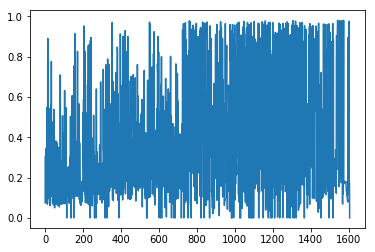

In [19]:
plt.plot(np.arange(0,len(filtered.values)), filtered.values)

In [67]:
len(filtered.values > 0.75)


1607

In [18]:
filtered.values

array([0.07635446, 0.30855109, 0.07443799, ..., 0.1796307 , 0.17579777,
       0.        ])

In [26]:
t4est = t_avg.sel(station='CA003013644').count() / len(t_avg.sel(station='CA003013644').values)

In [28]:
t4est

<xarray.DataArray ()>
array(0.071335)
Coordinates:
    station  <U11 'CA003013644'

In [50]:
t_avg_filtered.sel(station='CA003013644').count().values 

True

In [71]:
filter1 = filtered.where(filtered > 0.75, drop=True)

/Users/gbromley/anaconda3/envs/paper1_research/lib/python3.6/site-packages/xarray/core/dtypes.py:23: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(dtype, float):


In [81]:
filter1

<xarray.DataArray (station: 269)>
array([0.889758, 0.775986, 0.753841, ..., 0.979892, 0.894534, 0.975877])
Coordinates:
  * station  (station) object 'CA003011120' 'CA003012208' 'CA003023720' ...

In [77]:
t_avg_filtered = t_avg.sel(station = filter1.station.values)

In [83]:
t_avg_filtered.to_netcdf('~gbromley/data/ghcn_75_filtered.nc', mode='w')

In [85]:
test = t_avg_filtered.mean(dim='station').to_pandas()

In [105]:
test = test['1970-01-01':'2015-01-01']
avg = test['1970-01-01':'2015-01-01'].mean()
test = test - avg

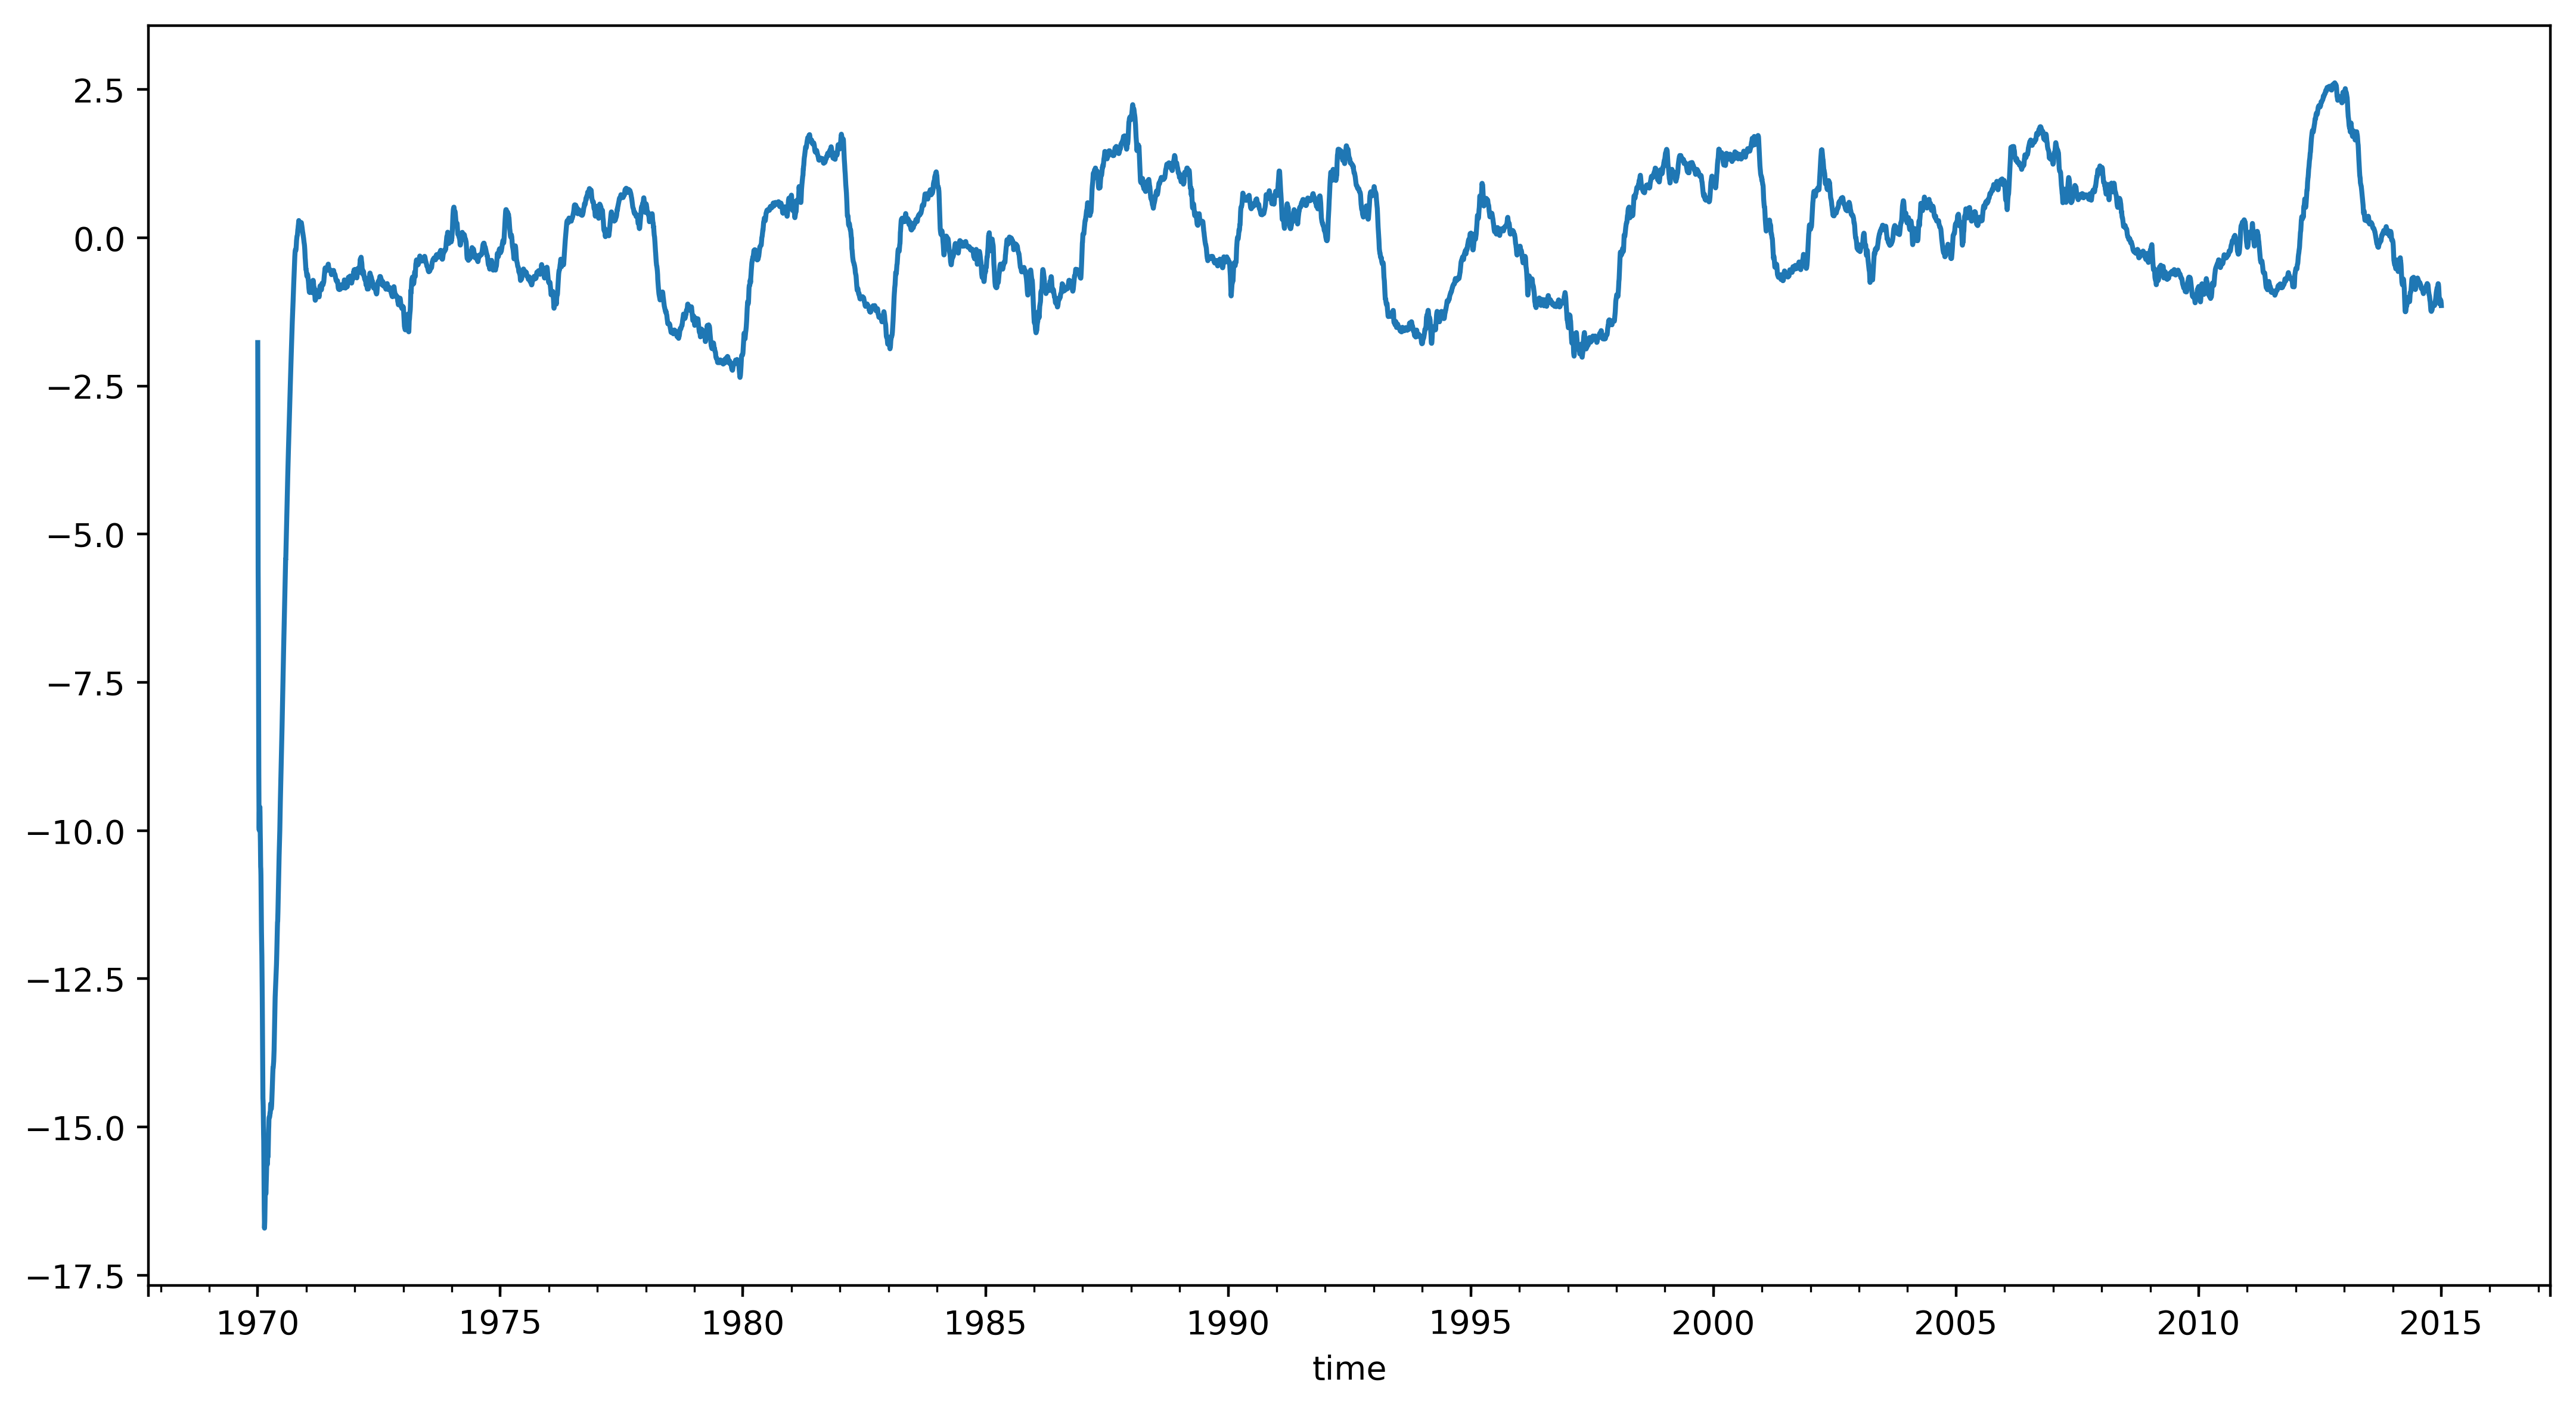

In [107]:
fig = plt.figure(1,figsize=(13,7), dpi=400.0)
test.rolling(window=365, min_periods=1).mean().plot()

In [108]:
station_info = pd.read_csv('/Users/gbromley/Dropbox/Montana_Climate_Project/Study_Area/NGP_basic_station_info.csv')

In [120]:
location = zip(station_info['lat'].values,station_info['lon'].values)
stations = station_info['station'].values
#station_dict = dict(station_info['station'],location)

In [123]:
location

In [ ]:
fig, ax = plt.subplots()
projection1 = ccrs.PlateCarree()
ax = plt.axes(projection=projection1)
ax.set_global()
ax.set_extent([ext_e, ext_w, ext_s, ext_n])
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax.add_feature(states_provinces, edgecolor='gray')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.scatter(data['lon'].values, data['lat'].values, marker='.', s=100, color='red',transform=projection1, label='GHCN Stations')

shape_feature = ShapelyFeature(Reader(shape).geometries(),
                                projection1,facecolor=None)

ax.add_feature(shape_feature, edgecolor='black', facecolor=(0,0,0,0))
ax.legend()
fig.set_size_inches(13,7)
fig.set_dpi=1200.0
ax.set_title('Location of GHCN Stations')
#plt.savefig(data_dir+'study_area_map.png')
plt.show()